In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
import pandas as pd
import os
path='/content/drive/MyDrive/CVSfileHecktor'
pathf=pd.read_csv('/content/drive/MyDrive/CVSfileHecktor/lastlayer_feat_hecktor.csv')
lastfeature=pathf
labdf='/content/drive/MyDrive/CVSfileHecktor/hecktor2021_patient_endpoint_training.csv'
labeldata=pd.read_csv(labdf)
P=labeldata['Progression']
T=labeldata['Progression free survival']
lastfeature.insert(145,'Progression',P)
lastfeature.insert(146,'Progression free survival',T)
lastfeature.rename(columns={'Progression free survival':'target'}, inplace=True)

In [4]:
lastfeature

,patient_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,...,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,Progression,target
0,CHGJ007,-7.517321,-8.467215,-8.513254,-8.698412,-8.857738,-8.910445,-8.943001,-8.906604,-8.870392,-8.787102,-8.724111,-8.616116,-8.541186,-8.452964,-8.429233,-8.366144,-8.356366,-8.291943,-8.296104,-8.238682,-8.243151,-8.193043,-8.222549,-8.175195,-8.185174,-8.130013,-8.143685,-8.085955,-8.097809,-8.050486,-8.078727,-8.036322,-8.059227,-8.016657,-8.047659,-8.014236,-8.042257,-8.007129,-8.033331,...,-7.386805,-7.443188,-7.533572,-7.582607,-7.666697,-7.709185,-7.786120,-7.811427,-7.864306,-7.864475,-7.905150,-7.899111,-7.936254,-7.930305,-7.974450,-7.968629,-8.016710,-8.004826,-8.048036,-8.040871,-8.078578,-8.057795,-8.096173,-8.080231,-8.135165,-8.133707,-8.181628,-8.151357,-8.183327,-8.164803,-8.208616,-8.181651,-8.214695,-8.169538,-8.173119,-8.053196,-8.045384,-7.126597,1,310
1,CHGJ008,-7.683802,-8.135052,-8.153481,-8.223858,-8.303789,-8.315951,-8.353004,-8.319837,-8.324048,-8.273632,-8.281539,-8.235341,-8.246411,-8.209873,-8.227706,-8.176949,-8.183622,-8.139798,-8.156087,-8.113367,-8.121806,-8.081960,-8.097019,-8.062227,-8.077236,-8.048395,-8.075448,-8.047117,-8.066898,-8.042371,-8.067255,-8.042924,-8.059982,-8.031995,-8.046880,-8.019599,-8.040806,-8.022655,-8.038469,...,-7.969650,-7.966496,-8.017434,-8.017156,-8.058480,-8.036119,-8.068726,-8.045216,-8.076925,-8.048114,-8.084498,-8.065784,-8.108162,-8.085933,-8.127543,-8.110157,-8.154586,-8.139464,-8.180134,-8.162575,-8.202653,-8.180817,-8.209786,-8.178550,-8.207985,-8.191620,-8.230564,-8.220807,-8.271929,-8.247563,-8.270304,-8.235515,-8.245650,-8.209352,-8.203735,-8.140244,-8.210161,-7.300578,0,2037
2,CHGJ010,-8.257301,-8.059567,-7.990803,-8.086707,-8.225202,-8.286564,-8.349352,-8.341010,-8.354363,-8.328756,-8.342839,-8.313148,-8.316041,-8.282685,-8.295352,-8.271245,-8.286003,-8.263865,-8.277118,-8.246711,-8.273641,-8.254636,-8.268053,-8.240821,-8.260031,-8.236711,-8.256396,-8.235326,-8.258673,-8.241766,-8.266410,-8.249516,-8.273986,-8.253621,-8.273449,-8.253797,-8.278251,-8.262142,-8.276724,...,-8.327236,-8.326781,-8.364759,-8.358528,-8.384975,-8.366294,-8.384082,-8.356073,-8.366461,-8.337849,-8.349748,-8.318260,-8.325590,-8.300199,-8.319569,-8.298929,-8.316368,-8.290595,-8.314487,-8.293219,-8.308311,-8.281547,-8.319916,-8.307797,-8.325330,-8.302131,-8.325345,-8.290750,-8.305173,-8.259790,-8.257285,-8.194950,-8.186791,-8.129108,-8.110393,-8.034371,-8.292694,-7.856173,0,1917
3,CHGJ013,-8.021438,-8.215602,-8.152780,-8.284893,-8.425662,-8.473149,-8.518524,-8.503143,-8.501078,-8.459977,-8.460469,-8.420499,-8.408777,-8.372013,-8.375021,-8.336830,-8.340338,-8.312404,-8.322250,-8.289376,-8.301921,-8.275942,-8.291136,-8.264295,-8.281152,-8.262895,-8.290273,-8.273500,-8.297922,-8.282863,-8.307242,-8.284968,-8.303709,-8.284683,-8.308757,-8.294594,-8.321325,-8.304393,-8.319209,...,-8.202542,-8.203902,-8.239321,-8.238369,-8.266223,-8.251597,-8.270884,-8.249800,-8.267765,-8.252643,-8.284534,-8.274263,-8.299130,-8.280480,-8.306044,-8.289276,-8.313334,-8.294202,-8.317640,-8.300358,-8.323935,-8.303214,-8.320106,-8.302923,-8.335535,-8.318891,-8.347610,-8.338334,-8.370489,-8.356055,-8.379559,-8.341596,-8.345322,-8.308146,-8.287323,-8.193943,-8.393070,-7.425754,0,1377
4,CHGJ015,-8.079620,-8.035719,-7.958462,-8.078260,-8.230578,-8.298374,-8.351585,-8.334088,-8.327169,-8.289190,-8.302470,-8.256535,-8.234167,-8.214702,-8.226695,-8.201663,-8.225394,-8.211002,-8.233793,-8.219454,-8.243158,-8.229738,-8.250956,-8.228767,-8.246034,-8.225575,-8.243726,-8.222157,-8.243743,-8.228487,-8.255259,-8.240725,-8.263817,-8.247068,-8.266474,-8.246023,-8.260985,-8.236046

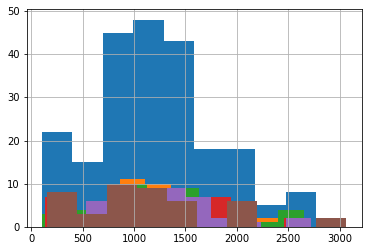

In [5]:
import numpy as np
import pandas as pd
import os
from sklearn import model_selection
#path='/content/drive/MyDrive/CVSfileHecktor'
#pathc=os.path.join(path,'clinical_hecktor1.csv')
df_train = lastfeature
df_train["kfold"] = -1
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indicies, "kfold"] = fold
df_train.kfold.count()
#df_train.loc['Progression free survival'] 
#df_train.rename(columns={'Progression free survival':'target'}, inplace=True)
df_train.target.hist()
df_train.kfold.value_counts()
df_train[df_train.kfold==0].target.hist()
df_train[df_train.kfold==1].target.hist()
df_train[df_train.kfold==2].target.hist()
df_train[df_train.kfold==3].target.hist()
df_train[df_train.kfold==4].target.hist()

In [6]:
!pip install lifelines

     |████████████████████████████████| 348 kB 5.2 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=9839ab69495fac14c52ed3a7c3baf388e11788ccefb7ae4e346ddc3dfe057f3f
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


[09:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 591.4181834299488
[09:25:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 626.0283275892139
[09:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 663.8027048719865
[09:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 605.9805824213707
Concordance index_XGB_fold1: 0.6182965299684543
Concordance index_XGB_fold2: 0.599476439790576
Concordance index_XGB_fold3: 0.6223776223776224
Concordance index_XGB_fold4: 0.3449367088607595


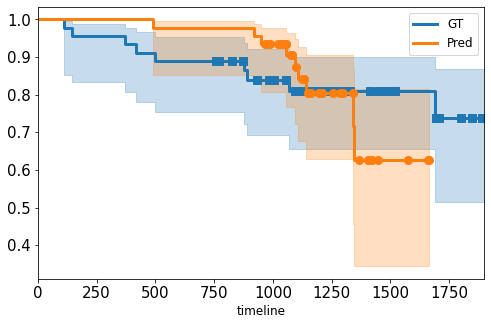

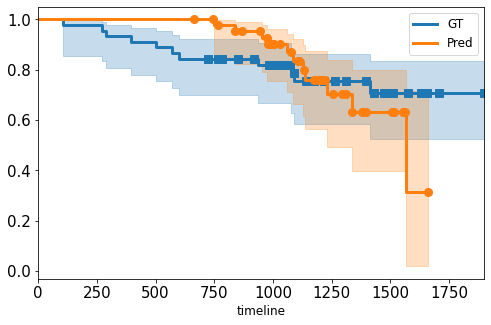

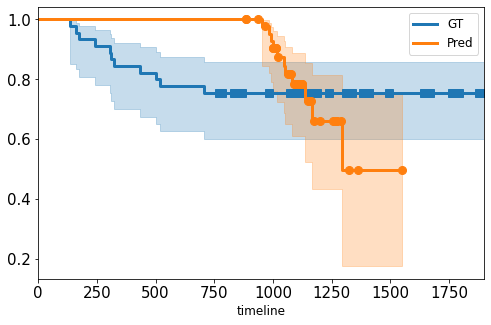

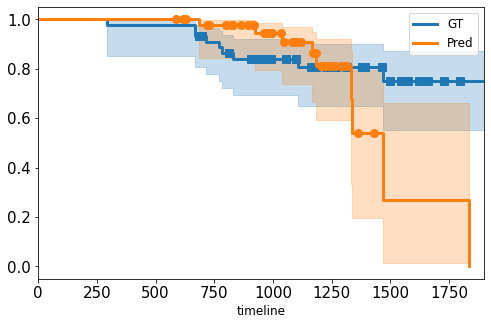

In [8]:
#XGBRegressor model
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df =df_train
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred,event)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1,event1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2,event2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3,event3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 645.4613822853603
1 698.6208249724019
2 725.2718256375277
3 636.8462131213139
Concordance index_XGB_fold1: 0.4037854889589905
Concordance index_XGB_fold2: 0.4895287958115183
Concordance index_XGB_fold3: 0.4405594405594406
Concordance index_XGB_fold4: 0.41139240506329117


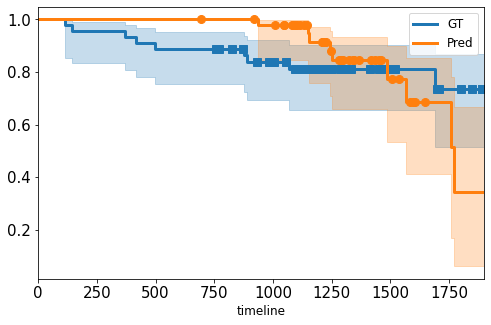

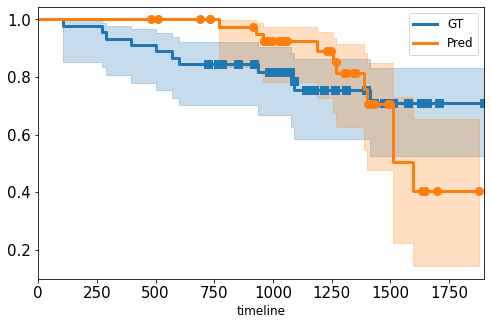

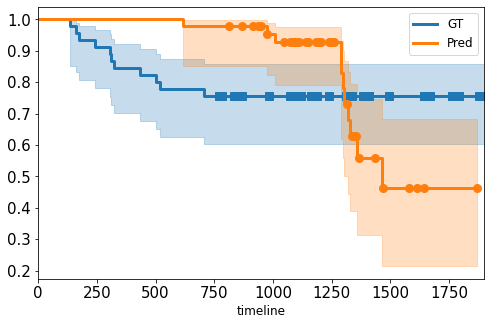

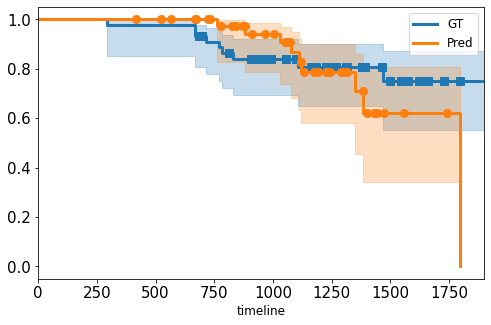

In [9]:
# GradientBoostingRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df =df_train
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=GradientBoostingRegressor(n_estimators=700,random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred,event)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1,event1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2,event2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3,event3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 574.6690403042193
1 631.9502277905198
2 683.0188013389487
3 559.2982432001755
Concordance index_XGB_fold1: 0.5520504731861199
Concordance index_XGB_fold2: 0.6073298429319371
Concordance index_XGB_fold3: 0.4965034965034965
Concordance index_XGB_fold4: 0.35443037974683544


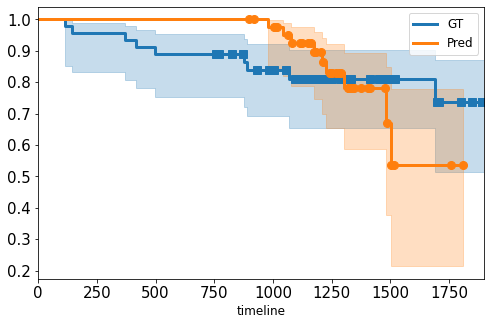

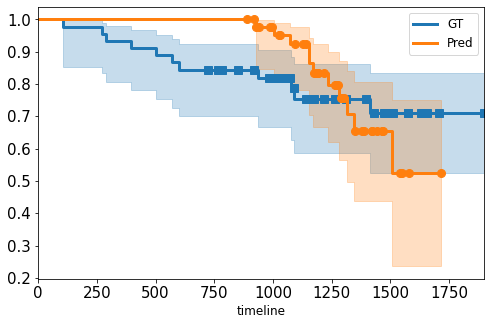

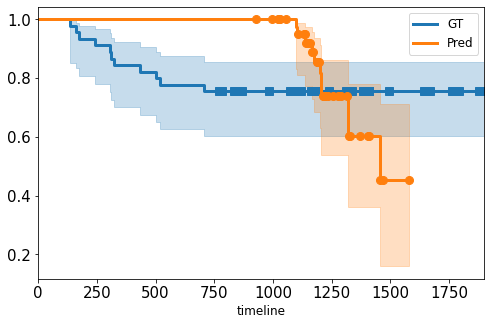

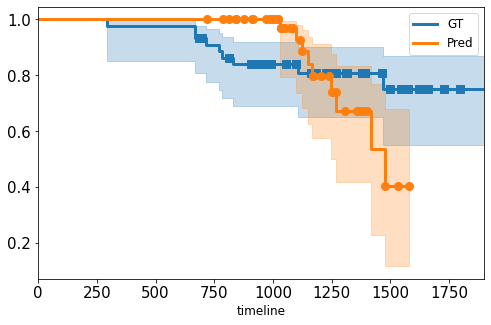

In [11]:
# RandomForestRegressor
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df =df_train
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=RandomForestRegressor(n_estimators=700,random_state=42)
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred,event)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1,event1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2,event2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3,event3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

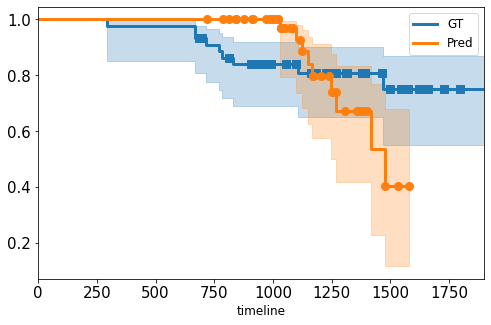

In [12]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

0 996.4779642989268
1 930.324996976863
2 735.1601941829489
3 729.7844126102509
Concordance index_XGB_fold1: 0.45454545454545453
Concordance index_XGB_fold2: 0.44545454545454544
Concordance index_XGB_fold3: 0.5914141414141414
Concordance index_XGB_fold4: 0.5156882591093117


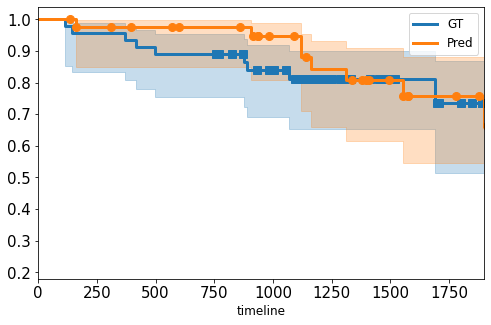

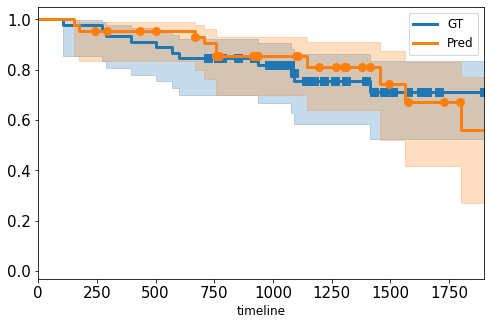

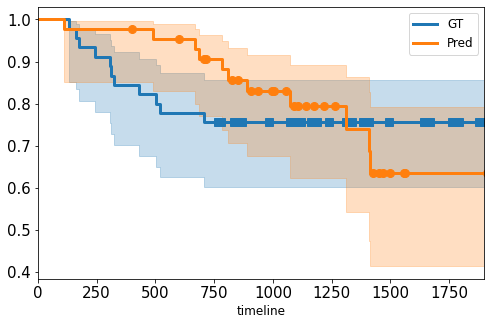

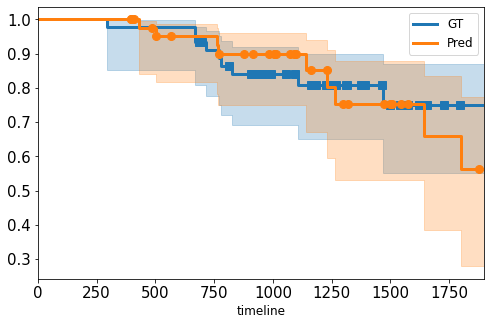

In [14]:
#XGBRegressor model
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df =df_train
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=DecisionTreeRegressor()
  model.fit(xtrain, ytrain)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

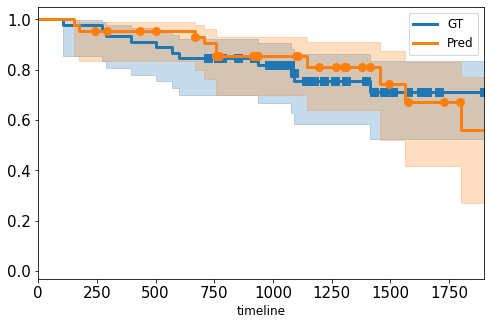

In [16]:
from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

[09:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 591.4181834299488
[09:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 626.0283275892139
[09:27:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 663.8027048719865
[09:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 605.9805824213707
Concordance index_XGB_fold1: 0.48282828282828283
Concordance index_XGB_fold2: 0.5545454545454546
Concordance index_XGB_fold3: 0.5121212121212121
Concordance index_XGB_fold4: 0.4726720647773279


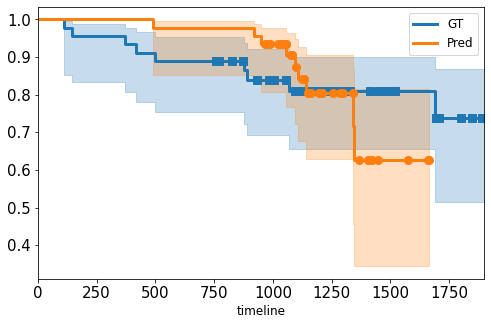

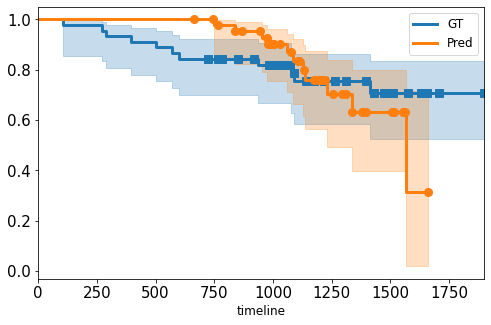

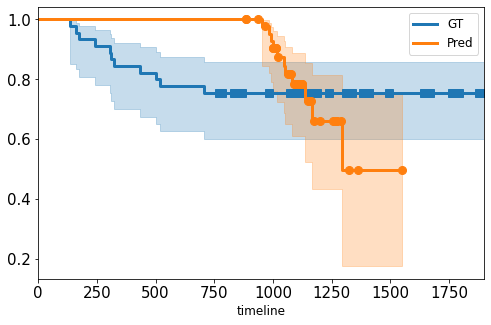

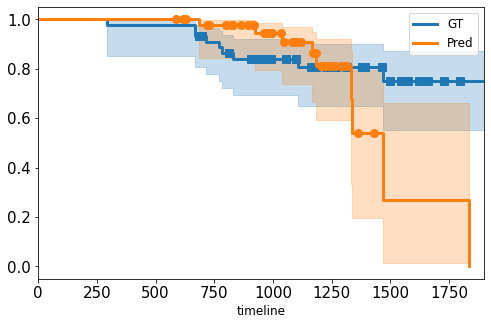

In [10]:
#XGBRegressor model
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'
df =df_train
#df=df_train
useful_features = [c for c in df.columns if c not in ("patient_id", "target","Progression", "kfold")]
final_predictions = []
final_true = []
y_eventf=[]
for fold in range(4):
  xtrain =  df[df.kfold != fold].reset_index(drop=True)
  xvalid = df[df.kfold == fold].reset_index(drop=True)
  ytrain = xtrain.target
  yvalid = xvalid.target
  y_event=xvalid.Progression
  xtrain = xtrain[useful_features]
  xvalid = xvalid[useful_features]
  min_max_scaler = preprocessing.MinMaxScaler()
  xtrain= min_max_scaler.fit_transform(xtrain)
  xvalid= min_max_scaler.transform(xvalid)
  model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
  model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
  #model.fit(xtrain, ytrain)
  preds_valid = model.predict(xvalid)
  #test_preds = model.predict(xtest)
  final_predictions.append(preds_valid)
  final_true.append(yvalid)
  y_eventf.append(y_event)
  print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

# predicted survival days for each fold
pred=final_predictions[0]
pred1=final_predictions[1]
pred2=final_predictions[2]
pred3=final_predictions[3]
# true survival days for each fold
true=(final_true)[0]
true1=(final_true)[1]
true2=(final_true)[2]
true3=(final_true)[3]
# event occured for each fold
event=np.array(y_eventf)[0]
event1=np.array(y_eventf)[1]
event2=np.array(y_eventf)[2]
event3=np.array(y_eventf)[3]
## compute c index for each fold
from lifelines.utils import concordance_index
print(f'Concordance index_XGB_fold1: {concordance_index(true, pred)}')
print(f'Concordance index_XGB_fold2: {concordance_index(true1, pred1)}')
print(f'Concordance index_XGB_fold3: {concordance_index(true2, pred2)}')
print(f'Concordance index_XGB_fold4: {concordance_index(true3, pred3)}')

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true, event, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred, event, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true1, event1, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred1, event1, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true2, event2, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred2, event2, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

from lifelines import KaplanMeierFitter
import numpy as np
from matplotlib import rc,rcParams
from pylab import *

## create a kmf object
kmf = KaplanMeierFitter() 
f = figure(figsize=(8,5))
## Fit the data into the model

kmf.fit(true3, event3, label='GT')    ## fit the cohort 1 data
#ax = kmf.plot(linewidth = 3,at_risk_counts=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'})
ax = kmf.plot(linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 's'})
ax.set_xlim([0.0, 1900])
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.legend(loc = 'upper right', fontsize = 20)
#ax.set_xlabel('Years', size = 10)

#fontsize = 20
#fontweight = 'bold'
#fontproperties = {'family':'sans-serif','sans-serif':['Helvetica'],'weight' : fontweight, 'size' : fontsize}
#ax.set_xticklabels(ax.get_xticks(), fontproperties)
#ax.set_yticklabels(ax.get_yticks(), fontproperties)

kmf.fit(pred3, event3, label='Pred')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax,linewidth = 3,show_censors=True, censor_styles={'ms': 8, 'marker': 'o'})
ax1.set_xlabel('timeline', size = 12)
ax1.legend(loc = 'upper right', fontsize = 12)

In [19]:
df_train.columns

Index(['patient_id', 'f_0', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7',
       'f_8',
       ...
       'f_137', 'f_138', 'f_139', 'f_140', 'f_141', 'f_142', 'f_143',
       'Progression', 'target', 'kfold'],
      dtype='object', length=148)

In [20]:
#### All Regressor models based on last layers features
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#path='/content/drive/MyDrive/CVSfileHecktor'
#patht='/content/drive/MyDrive/CVSfileHecktor/combined_features.csv'
#df = pd.read_csv(patht)
#df_test = pd.read_csv("../input/30-days-of-ml/test.csv")
# #sample_submission = pd.read_csv("../input/30-days-of-ml/sample_submission.csv")

# useful_features = [c for c in df.columns if c not in ("participant_id", "target", "kfold")]
# #object_cols = [col for col in useful_features if 'cat' in col]
# #df_test = df_test[useful_features]
# xgb='ggg'

class model_selection:
    def __init__(self,root,model_selec):
        self.root=root
        self.model_selec=model_selec
        self.df = df_train
        self.useful_features = [c for c in self.df.columns if c not in ("patient_id", "target","Progression", "kfold")]
    def model_selction(self):
        final_predictions = []
        final_true = []
        y_eventf=[]
        for fold in range(4):
            xtrain =  self.df[self.df.kfold != fold].reset_index(drop=True)
            xvalid = self.df[self.df.kfold == fold].reset_index(drop=True)
            #xtest = df_test.copy()

            ytrain = xtrain.target
            yvalid = xvalid.target
            y_event=xvalid.Progression
    
            xtrain = xtrain[self.useful_features]
            xvalid = xvalid[self.useful_features]
            min_max_scaler = preprocessing.MinMaxScaler()
            xtrain= min_max_scaler.fit_transform(xtrain)
            xvalid= min_max_scaler.transform(xvalid)
            if self.model_selec=='XGB':
                model=XGBRegressor(n_estimators=500, learning_rate=0.03, n_jobs=4)
                model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xvalid, yvalid)],verbose=False)
                #model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
    
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
        
            elif self.model_selec=='GB':
                model = GradientBoostingRegressor(n_estimators=700,random_state=42)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='RF':
                model = RandomForestRegressor(random_state=42)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
            
            
            elif self.model_selec=='DT':
                model = DecisionTreeRegressor(max_leaf_nodes=500, random_state=42)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
               
            elif self.model_selec=='ET':
                
                model=ExtraTreesRegressor(n_estimators=100, random_state=42) 
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='BR':
                model=BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='SR':
                estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
                model= StackingRegressor(estimators=estimators,
                                         final_estimator=RandomForestRegressor(n_estimators=10,
                                                                               random_state=42)
                                         )
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='VR':
                r1 = LinearRegression()
                r2 = RandomForestRegressor(n_estimators=10, random_state=42)
                model= VotingRegressor([('lr', r1), ('rf', r2)])
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='HGB':
                model= HistGradientBoostingRegressor()
                model.fit(xtrain, ytrain)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
                
            elif self.model_selec=='XGbOPTM':
                params = {'learning_rate': 0.07853392035787837, 'reg_lambda': 1.7549293092194938e-05, 'reg_alpha': 14.68267919457715, 'subsample': 0.8031450486786944, 'colsample_bytree': 0.170759104940733, 'max_depth': 3}
    
                model = XGBRegressor(random_state=0, #tree_method='gpu_hist',
                                     #gpu_id=0,
                                     #predictor="gpu_predictor",
                                     n_estimators=5000,
                                     **params
                                     )
                model.fit(xtrain, ytrain, early_stopping_rounds=300, eval_set=[(xvalid, yvalid)], verbose=1000)
                preds_valid = model.predict(xvalid)
                #test_preds = model.predict(xtest)
                final_predictions.append(preds_valid)
                final_true.append(yvalid)
                y_eventf.append(y_event)
                #rmse = mean_squared_error(yvalid, preds_valid, squared=False)
                #print(fold, rmse)
                print(fold, mean_squared_error(yvalid, preds_valid, squared=False))
            
            
        preds = np.mean(np.column_stack(final_predictions), axis=1)
        true = np.mean(np.column_stack(final_true), axis=1)
        y_eventn=np.mean(np.column_stack(y_eventf), axis=1)
        return preds,true,y_eventn
    
  
model= HistGradientBoostingRegressor()    
  
selction=['XGB','GB','RF','DT','ET','BR','SR','VR','HGB','XGbOPTM']
dfdic={'pred':[],'GT':[],'event':[],}
for i in selction:
    #model_selec='XGB'
    model1=model_selection(pathf,i) 
    preds,true,y_eventn=model1.model_selction() 
    dfdic['pred'].append(preds)
    dfdic['GT'].append(true)
    dfdic['event'].append(y_eventn)


dff=pd.DataFrame(dfdic['GT']).T
dff.rename(columns={0:'target'}, inplace=True)
gt=dff['target']
dff1=pd.DataFrame(dfdic['event']).T
#print(dff1)
#dff.rename(columns={11:'event'}, inplace=True)
modelspred=pd.DataFrame(dfdic['pred']).T

modelspred.rename(columns={0:'XGB',
                       1:'GB',
                       2:'RF',
                       3:'DT',
                       4:'ET',
                       5:'BT',
                       6:'SR',
                       7:'VR',
                       8:'HGB',
                       9:'XGbOPTM',}, inplace=True)

Results=pd.concat([modelspred,gt],axis=1)

[09:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0 591.4181834299488
[09:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1 626.0283275892139
[09:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
2 663.8027048719865
[09:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
3 605.9805824213707
0 645.4613822853603
1 698.6208249724019
2 725.2718256375277
3 636.8462131213139
0 573.7147062415062
1 621.5843616955339
2 682.5070657981823
3 557.1338479037152
0 866.9157590754326
1 991.8674194557344
2 756.9694548365578
3 805.2886990942371
0 563.5299971528677
1 672.2695140145307
2 704.1420741472878
3 580.2452788567568
0 565.9043673800095
1 609.496434820459
2 649.178698013108
3 493.7419321982241
0 610.01399783

In [21]:
GT=Results['target']
XGB=Results['XGB']
GB=Results['GB']
RF=Results['RF']
DT=Results['DT']
ET=Results['ET']
BT=Results['BT']
SR=Results['SR']
VR=Results['VR']
HGB=Results['HGB']
XGbOPTM=Results['XGbOPTM']
print(f'Concordance index_XGB: {concordance_index(GT,XGB)}')
print(f'Concordance index_GB: {concordance_index(GT,GB)}')
print(f'Concordance index_RF: {concordance_index(GT,RF)}')
print(f'Concordance index_DT: {concordance_index(GT,DT)}')
print(f'Concordance index_ET: {concordance_index(GT,ET)}')
print(f'Concordance index_BT: {concordance_index(GT,BT)}')
print(f'Concordance index_SR: {concordance_index(GT,SR)}')
print(f'Concordance index_VR: {concordance_index(GT,VR)}')
print(f'Concordance index_HGB: {concordance_index(GT,HGB)}')
print(f'Concordance index_XGbOPTM: {concordance_index(GT,XGbOPTM)}')

Concordance index_XGB: 0.5777777777777777
Concordance index_GB: 0.5111111111111111
Concordance index_RF: 0.591919191919192
Concordance index_DT: 0.4919191919191919
Concordance index_ET: 0.5737373737373738
Concordance index_BT: 0.592929292929293
Concordance index_SR: 0.4868686868686869
Concordance index_VR: 0.4505050505050505
Concordance index_HGB: 0.5070707070707071
Concordance index_XGbOPTM: 0.5737373737373738
